In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Red Wine Quality

In this project, I will perform some exploratory data analysis and create a model to predict the quality of red wine.

First, import the data.

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Exploratory Data Analysis

The aim of this project is to determine what variables effect the quality of red wine and use the data provided in order to predict the quality of future red wines. As a result, it will be useful to determine the effect of each variable on the wine quality in turn.

## Fixed Acidity

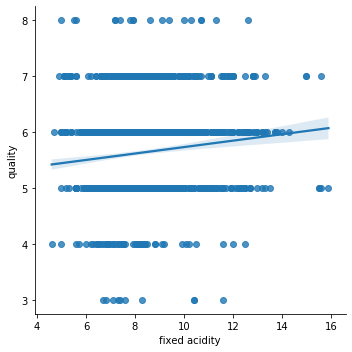

In [11]:
sns.lmplot(x='fixed acidity',y='quality',data=df)

This plot seems to show that there is little to no correlation between the fixed acidity of the wine and its quality. Let us move on to the next variable.

## Volatile Acidity

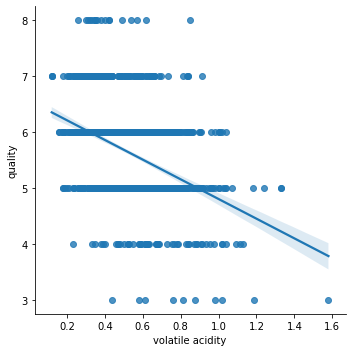

In [10]:
sns.lmplot(x='volatile acidity',y='quality',data=df)

The plot above shows that there is a reasonably strong negative correlation between volatile acidity and quality. It appears that the higher quality wines have a lower average volatile acidity level.

In [14]:
df.groupby('quality').mean()['volatile acidity']

quality
3    0.884500
4    0.693962
5    0.577041
6    0.497484
7    0.403920
8    0.423333
Name: volatile acidity, dtype: float64

The series above highlights the observation even further and as a result this variable appears to be an important factor in determining the quality of red wine. 

Let us now move on to the next variable.

## Citric Acid

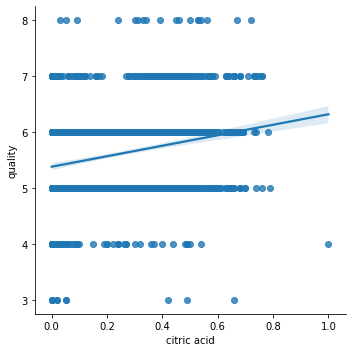

In [15]:
sns.lmplot(x='citric acid',y='quality',data=df)

In [16]:
df.groupby('quality').mean()['citric acid']

quality
3    0.171000
4    0.174151
5    0.243686
6    0.273824
7    0.375176
8    0.391111
Name: citric acid, dtype: float64

The plot and series above show that there is a steady increase of wine quality as the citric acid level increases. As a result, this variable will be considered to be an important one in predicting the quality of wine.

## Residual Sugar

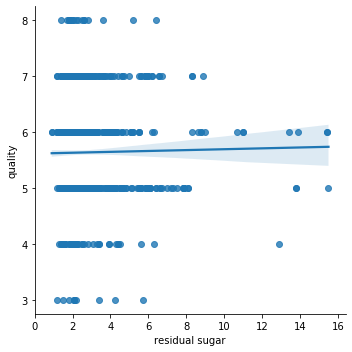

In [17]:
sns.lmplot(x='residual sugar',y='quality',data=df)

This plot shows that the residual sugar level of the red wine has no effect on the quality. 

## Chlorides

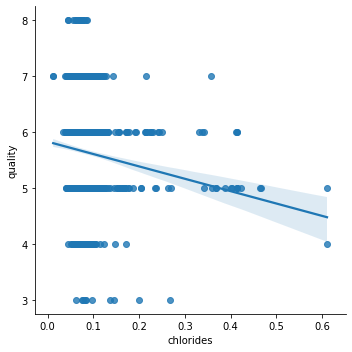

In [19]:
sns.lmplot(x='chlorides',y='quality',data=df)

This linear model plot seems to show that there is a negative relationshi between the chlorides contained within a wine and the wine's quality. However, there are two wines within the dataset that have a seemingly large value chloride value, and this may be affecting the fitting of the linear model. Let us explore this further by investigating the mean chloride level per quality value.

In [21]:
df.groupby('quality').mean()['chlorides']

quality
3    0.122500
4    0.090679
5    0.092736
6    0.084956
7    0.076588
8    0.068444
Name: chlorides, dtype: float64

The series above clearly shows the same trend, but let us remove the two rows where the chloride value equals 0.6 and repeat the plot.

In [23]:
df = df[df['chlorides'] < 0.6]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1597 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1597 non-null   float64
 1   volatile acidity      1597 non-null   float64
 2   citric acid           1597 non-null   float64
 3   residual sugar        1597 non-null   float64
 4   chlorides             1597 non-null   float64
 5   free sulfur dioxide   1597 non-null   float64
 6   total sulfur dioxide  1597 non-null   float64
 7   density               1597 non-null   float64
 8   pH                    1597 non-null   float64
 9   sulphates             1597 non-null   float64
 10  alcohol               1597 non-null   float64
 11  quality               1597 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 162.2 KB


We have successfully removed the appropriate rows. Let us now repeat the plot and see how the linear model has changed as a result.

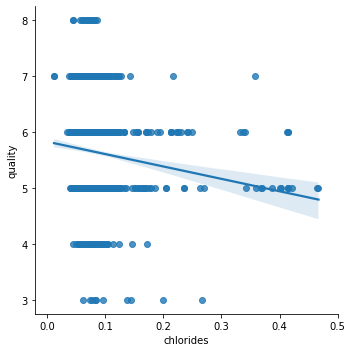

In [25]:
sns.lmplot(x='chlorides',y='quality',data=df)

There is still a clear and obvious negative relationship between these two variables and the outlying values had little effect on this relationship. Let us add those values back into the dataset by re-reading the csv file.

In [26]:
df = pd.read_csv('winequality-red.csv')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Free Sulfur Dioxide

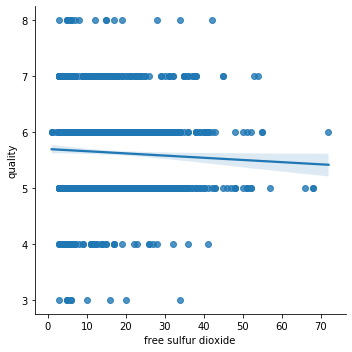

In [28]:
sns.lmplot(x='free sulfur dioxide',y='quality',data=df)

This plot shows that there is no notable relationship between the free sulfur dioxide within the wine and the quality of the wine.

## Total Sulfur Dioxide

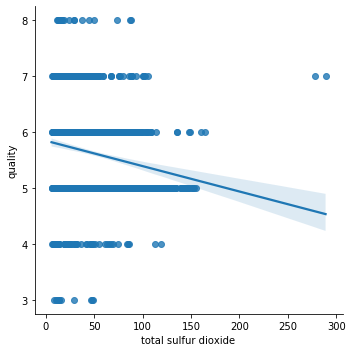

In [29]:
sns.lmplot(x='total sulfur dioxide',y='quality',data=df)

We notice from this plot that there are two wines of quality equal to 7 that have an extremely large amount of sulfur dioxide within them. Overall, there seems to be a negative impact on the quality of the wine as the total sulfur dioxide increases. Let us investigate the two outlying wines.

In [38]:
df = df[df['total sulfur dioxide'] < 250]

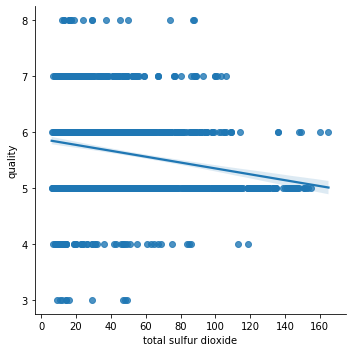

In [39]:
sns.lmplot(x='total sulfur dioxide',y='quality',data=df)

Text(0.5, 1.0, 'Average total sulfur dioxide per quality rating')

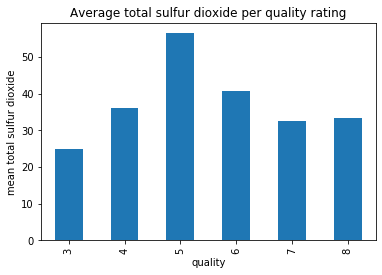

In [48]:
plt.figure()
df.groupby('quality').mean()['total sulfur dioxide'].plot(kind='bar')
plt.ylabel('mean total sulfur dioxide')
plt.title('Average total sulfur dioxide per quality rating')

After removing the two outlying wines, we can see that the overall relationship between the total sulfur dioxide and the quality of the wine seems to be unchanged. 

This variable seems to be an important factor in determining the quality of a wine.

## Density

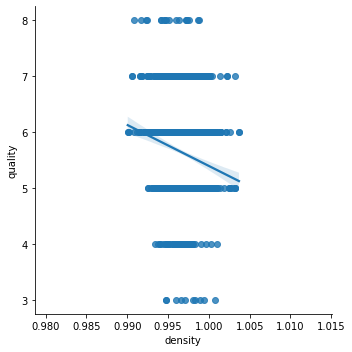

In [40]:
sns.lmplot(x='density',y='quality',data=df)

In [41]:
df['density'].describe()

count    1597.000000
mean        0.996751
std         0.001884
min         0.990070
25%         0.995600
50%         0.996750
75%         0.997840
max         1.003690
Name: density, dtype: float64

Text(0.5, 1.0, 'Average density per quality rating')

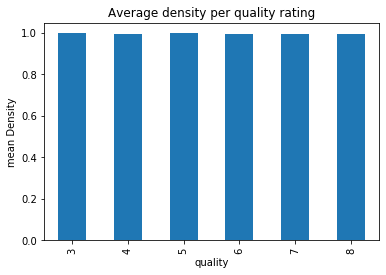

In [47]:
plt.figure()
df.groupby('quality').mean()['density'].plot(kind='bar')
plt.ylabel('mean Density')
plt.title('Average density per quality rating')

The range of density values for the observations we have within our dataset is extremely narrow. As a result, the linear model plot shown above does not necessarily indicate a clear relationship between the two variables. This is indicated by the bar plot as the mean density for all wines within each class quality rating does not change significantly.

## pH

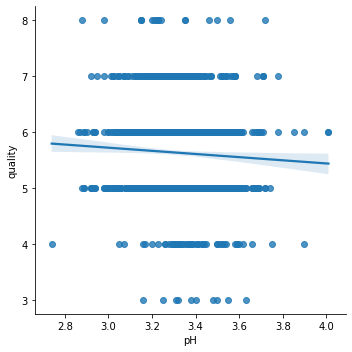

In [49]:
sns.lmplot(x='pH',y='quality',data=df)

Text(0.5, 1.0, 'Average pH per quality rating')

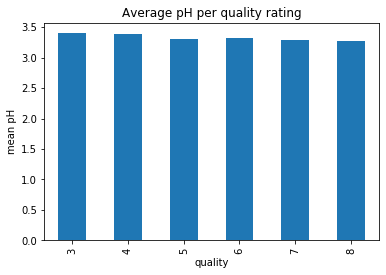

In [50]:
plt.figure()
df.groupby('quality').mean()['pH'].plot(kind='bar')
plt.ylabel('mean pH')
plt.title('Average pH per quality rating')

We can see that the pH variable seems to have little effect on the overall quality of the wine.

## Sulphates

Text(0.5, 1.0, 'Mean sulphates per quality rating')

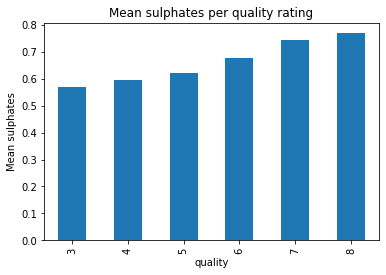

In [52]:
plt.figure()
df.groupby('quality').mean()['sulphates'].plot(kind='bar')
plt.ylabel('Mean sulphates')
plt.title('Mean sulphates per quality rating')

The bar graph above shows that there is a clear relationship between the sulphate level and the quality of the wine. 

## Alcohol

Text(0.5, 1.0, 'Mean alcohol per quality rating')

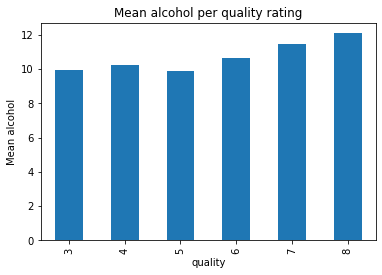

In [53]:
plt.figure()
df.groupby('quality').mean()['alcohol'].plot(kind='bar')
plt.ylabel('Mean alcohol')
plt.title('Mean alcohol per quality rating')

This bar chart seems to show that there is a slight positive relationship between the alcohol percentage and the wine's quality. This intuitively follows expectation as customers regularly prefer to by wines with a higher alcohol percentage and as a result they believe that the wines of higher alcohol percentage are of higher quality.

In conclusion, it appears like the main factors affecting the quality of wine are:

1) Volatile Acidity
2) Citric Acid
3) Chlorides
4) Total Sulfur Dioxide
5) Sulphates
6) Alcohol

## Inter Variable Relationships

Let us now investigate the relationships between our variables, using a heatmap.

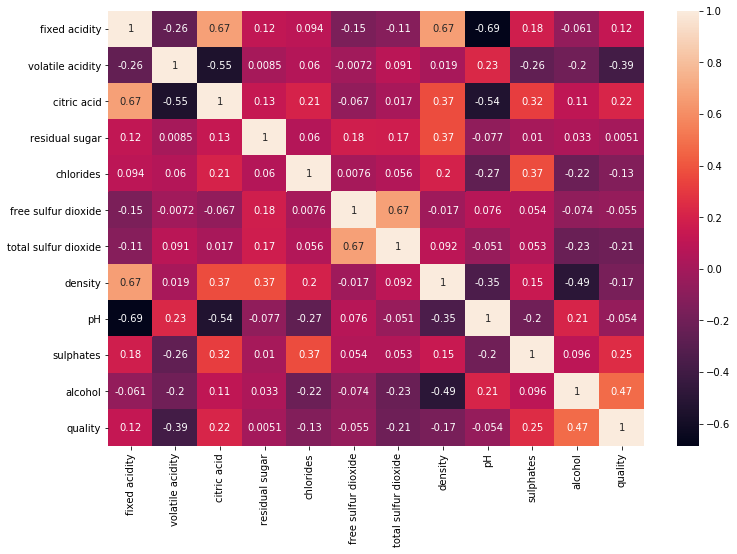

In [55]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [58]:
len(df[df['total sulfur dioxide'] >= df['free sulfur dioxide']])

1597

The heatmap above confirms the results from our earlier analysis as we are able to see large correlations between the variables listed above and the quality of the wine. We also notice some further relationsips between our variables.

1. Total Sulfur Dioxide v Free Sulfur Dioxide - These two variables are highly correlated. We notice in all wines stored that the value of 'Total Sulfur Dioxide' is greater than or equal to the value of 'Free Sulfur Dioxide'. As a result, in order to reduce the risk of multicolinearity, we shall drop the 'Free Sulfur Dioxide' column, since the 'Total Sulfur Dioxide' has a stronger correlation to our target variable.
2. Fixed Acidity v pH: Since the pH scale is used to describe how acidic or alkaline a fluid is, it makes sense that these two variables are correlated. 
3. Fixed Acidity v Density. Since these two variables are not considered as an important factor in determining the quality of wine, the relationship between them shall not be investigated.
4. Fixed Acidity v Citric Acid. Naturally, the more citric acid a fluid contains, the higher its fixed acidity will be. As a result of points 2-4, we shall drop the 'Fixed Acidity' column from our dataset.

Let us now drop the two columns mentioned above from our dataset as we have deemed them to not be determining factors within the quality of red wine. 

In [59]:
df = df.drop(['free sulfur dioxide','fixed acidity'],axis=1)

In [60]:
df.head()

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.70,0.00,1.9,0.076,34.0,0.9978,3.51,0.56,9.4,5
1,0.88,0.00,2.6,0.098,67.0,0.9968,3.20,0.68,9.8,5
2,0.76,0.04,2.3,0.092,54.0,0.9970,3.26,0.65,9.8,5
3,0.28,0.56,1.9,0.075,60.0,0.9980,3.16,0.58,9.8,6
4,0.70,0.00,1.9,0.076,34.0,0.9978,3.51,0.56,9.4,5


## Investigating the distribution of Quality Classes

Since we are performing a classification task, it is useful to know how our dataset splits into the various quality classes.

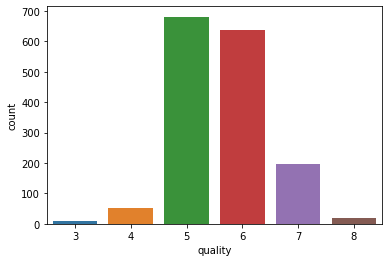

In [61]:
sns.countplot(x='quality',data=df)

In [66]:
df.groupby('quality').count()['pH'] * 100 /len(df)

quality
3     0.626174
4     3.318723
5    42.642455
6    39.949906
7    12.335629
8     1.127113
Name: pH, dtype: float64

The dataset we are considering is extremely unbalanced, with over 80% of the dataset falling within two of the six possible quality ratings. However, if we consider wines that have a quality rating of 5 and under as 'bad' and wines with a quality rating of 6 and above as 'good' we get a more balanced dataset.

In [85]:
df['new_rating'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)

In [87]:
df['new_rating'].value_counts() * 100 / len(df)

1    53.412649
0    46.587351
Name: new_rating, dtype: float64

In [88]:
df = df.drop('quality',axis=1)

Let us now create training and test sets for our data.

In [89]:
from sklearn.model_selection import train_test_split
X = df.drop('new_rating',axis=1)
y = df['new_rating']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

## Model Training and Testing

Let us now begin to train some models and determine the best model at predicting the quality of wine.

### Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression

In [96]:
lr_model = LogisticRegression(max_iter=2000)

In [97]:
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Generate Predictions

In [98]:
lr_predictions = lr_model.predict(X_test)

#### Confusion Matrix and Classification Report

In [99]:
from sklearn.metrics import confusion_matrix,classification_report

In [100]:
print(confusion_matrix(y_test, lr_predictions))

[[171  72]
 [ 55 182]]


In [101]:
print(classification_report(y_test,lr_predictions))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73       243
           1       0.72      0.77      0.74       237

    accuracy                           0.74       480
   macro avg       0.74      0.74      0.74       480
weighted avg       0.74      0.74      0.74       480



Our logistic regression model acheived an accuracy of approximately 74%.

### Decision Tree

In [102]:
from sklearn.tree import DecisionTreeClassifier

In [103]:
dtree = DecisionTreeClassifier()

In [104]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### Generate Predictions

In [105]:
dtree_preds = dtree.predict(X_test)

#### Confusion Matrix and Classification Report

In [106]:
print(confusion_matrix(y_test,dtree_preds))

[[164  79]
 [ 56 181]]


In [107]:
print(classification_report(y_test,dtree_preds))

              precision    recall  f1-score   support

           0       0.75      0.67      0.71       243
           1       0.70      0.76      0.73       237

    accuracy                           0.72       480
   macro avg       0.72      0.72      0.72       480
weighted avg       0.72      0.72      0.72       480



Our decision tree model achieved an accuracy of about 72%.

### Random Forests

In [108]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Generate Predicitons

In [109]:
rfc_preds = rfc.predict(X_test)

#### Confusion Matrix and Classification Report

In [110]:
print(confusion_matrix(y_test,rfc_preds))

[[187  56]
 [ 39 198]]


In [111]:
print(classification_report(y_test,rfc_preds))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       243
           1       0.78      0.84      0.81       237

    accuracy                           0.80       480
   macro avg       0.80      0.80      0.80       480
weighted avg       0.80      0.80      0.80       480



Our random forest classifier managed to achieve an accuracy of 80%.

### Support Vector Machines

In [113]:
from sklearn.svm import SVC

In [114]:
svc = SVC()

In [115]:
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Generate Predictions

In [116]:
svc_preds = svc.predict(X_test)

#### Confusion Matrix and Classification Report

In [117]:
print(confusion_matrix(y_test,svc_preds))

[[ 68 175]
 [ 39 198]]


In [118]:
print(classification_report(y_test,svc_preds))

              precision    recall  f1-score   support

           0       0.64      0.28      0.39       243
           1       0.53      0.84      0.65       237

    accuracy                           0.55       480
   macro avg       0.58      0.56      0.52       480
weighted avg       0.58      0.55      0.52       480



Our SVC model achieved an accuracy of 55%. However, let us use a grid search in order to try and alter the models paramaters to achieve a better accuracy.

In [119]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.554, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.549, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.552, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.552, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.552, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.647, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.661, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.628, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.641, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.772, total=   0.3s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.786, total=   0.2s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.691, total=   0.2s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.709, total=   0.2s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.686, total=   0.2s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.692, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.719, total=   0.2s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.722, total=   0.3s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.731, total=   0.6s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.750, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.799, total=   0.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.740, total=   0.3s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.713, total=   0.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.726, total=   0.1s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   42.8s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

#### Generate Predictions

We will generate new predictions using the best estimators found in the grid search completed above.

In [120]:
grid.best_estimator_

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [121]:
grid_predictions = grid.predict(X_test)

#### Confusion Matrix and Classification Report

In [122]:
print(confusion_matrix(y_test,grid_predictions))

[[180  63]
 [ 60 177]]


In [123]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.75      0.74      0.75       243
           1       0.74      0.75      0.74       237

    accuracy                           0.74       480
   macro avg       0.74      0.74      0.74       480
weighted avg       0.74      0.74      0.74       480



Despite performing the grid search, we have only managed to achieve a 74% accuracy score.

### Deep Learning

In order to use deep learning, we are going to have to normalise the data. We shall do this using the standard scalar.

In [139]:
from sklearn.preprocessing import StandardScaler

In [140]:
scaler = StandardScaler()

In [141]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [142]:
X_scaled = scaler.fit_transform(X)

In [143]:
df_feat = pd.DataFrame(X_scaled,columns=df.columns[:-1])
df_feat.head()

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.960657,-1.391823,-0.452579,-0.244648,-0.382535,0.556807,1.288470,-0.580216,-0.959307
1,1.966614,-1.391823,0.049020,0.222827,0.654661,0.025923,-0.723652,0.127837,-0.583341
2,1.295976,-1.185980,-0.165951,0.095334,0.246069,0.132100,-0.334209,-0.049176,-0.583341
3,-1.386577,1.489975,-0.452579,-0.265897,0.434650,0.662984,-0.983280,-0.462207,-0.583341
4,0.960657,-1.391823,-0.452579,-0.244648,-0.382535,0.556807,1.288470,-0.580216,-0.959307


#### Train Test Split

In [149]:
X = df_feat.values
y = df['new_rating'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### Create a Neural Network

In [150]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [151]:
nn = Sequential()

nn.add(Dense(9,activation='relu'))
nn.add(Dropout(0.2))

nn.add(Dense(7,activation='relu'))
nn.add(Dropout(0.2))

nn.add(Dense(5,activation='relu'))
nn.add(Dropout(0.2))

nn.add(Dense(3,activation='relu'))
nn.add(Dropout(0.2))

nn.add(Dense(1,activation='sigmoid'))

nn.compile(loss='binary_crossentropy',optimizer='adam')

In [152]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [153]:
nn.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 1117 samples, validate on 480 samples
Epoch 1/600
1117/1117 [==============================] - 3s 3ms/sample - loss: 0.8161 - val_loss: 0.7295
Epoch 2/600
1117/1117 [==============================] - ETA: 0s - loss: 0.740 - 1s 622us/sample - loss: 0.7395 - val_loss: 0.6927
Epoch 3/600
1117/1117 [==============================] - 1s 634us/sample - loss: 0.7044 - val_loss: 0.6756
Epoch 4/600
1117/1117 [==============================] - 1s 636us/sample - loss: 0.6809 - val_loss: 0.6650
Epoch 5/600
1117/1117 [==============================] - 1s 721us/sample - loss: 0.6833 - val_loss: 0.6555
Epoch 6/600
1117/1117 [==============================] - 1s 609us/sample - loss: 0.6646 - val_loss: 0.6457
Epoch 7/600
1117/1117 [==============================] - 1s 693us/sample - loss: 0.6455 - val_loss: 0.6339
Epoch 8/600
1117/1117 [==============================] - 1s 644us/sample - loss: 0.6452 

1117/1117 [==============================] - 1s 554us/sample - loss: 0.5260 - val_loss: 0.5404
Epoch 149/600
1117/1117 [==============================] - 1s 550us/sample - loss: 0.5348 - val_loss: 0.5383
Epoch 150/600
1117/1117 [==============================] - 1s 599us/sample - loss: 0.5320 - val_loss: 0.5410
Epoch 151/600
1117/1117 [==============================] - 1s 682us/sample - loss: 0.5302 - val_loss: 0.5414
Epoch 152/600
1117/1117 [==============================] - 1s 628us/sample - loss: 0.5464 - val_loss: 0.5384
Epoch 153/600
1117/1117 [==============================] - 1s 658us/sample - loss: 0.5299 - val_loss: 0.5389
Epoch 154/600
1117/1117 [==============================] - 1s 567us/sample - loss: 0.5303 - val_loss: 0.5404
Epoch 155/600
1117/1117 [==============================] - 1s 622us/sample - loss: 0.5493 - val_loss: 0.5390
Epoch 156/600
1117/1117 [==============================] - 1s 673us/sample - loss: 0.5448 - val_loss: 0.5378
Epoch 157/600
1117/1117 [========

1117/1117 [==============================] - 1s 623us/sample - loss: 0.5247 - val_loss: 0.5327
Epoch 224/600
1117/1117 [==============================] - 1s 784us/sample - loss: 0.5247 - val_loss: 0.5323
Epoch 225/600
1117/1117 [==============================] - 1s 572us/sample - loss: 0.5194 - val_loss: 0.5335
Epoch 226/600
1117/1117 [==============================] - 1s 507us/sample - loss: 0.5148 - val_loss: 0.5320
Epoch 227/600
1117/1117 [==============================] - 1s 756us/sample - loss: 0.5384 - val_loss: 0.5319
Epoch 228/600
1117/1117 [==============================] - 1s 687us/sample - loss: 0.5119 - val_loss: 0.5328
Epoch 229/600
1117/1117 [==============================] - 1s 703us/sample - loss: 0.5346 - val_loss: 0.5318
Epoch 230/600
1117/1117 [==============================] - 1s 664us/sample - loss: 0.5177 - val_loss: 0.5307
Epoch 231/600
1117/1117 [==============================] - 1s 655us/sample - loss: 0.5188 - val_loss: 0.5318
Epoch 232/600
1117/1117 [========

#### Generate Predictions

In [154]:
nn_preds = nn.predict_classes(X_test)

#### Confusion Matrix and Classification Report

In [155]:
print(confusion_matrix(y_test,nn_preds))

[[196  47]
 [ 73 164]]


In [156]:
print(classification_report(y_test,nn_preds))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       243
           1       0.78      0.69      0.73       237

    accuracy                           0.75       480
   macro avg       0.75      0.75      0.75       480
weighted avg       0.75      0.75      0.75       480

